# Computing volume fractions by intersecting unstructured meshes

**Code used to generate the data**: 

**Article DOI**: 

**Research data archive**:

## Surface-Mesh / Cell Intersection Algorithm

**TODO**: Short description


## Sphere Initialization

In [1]:
# Pick up .csv files 
import os
import pandas as pd
from math import pi
from plot_study import *

In [2]:
import warnings 
# Set the GEOM_VOF_INIT environmental variable to the folder where you want the data to be saved. 
data_dir = os.curdir
try:
    data_dir = os.environ["GEOM_VOF_INIT"] 
except:
    warnings.warn("No GEOM_VOF_INIT environmental variable set, storing data in the current working directory.") 

### Volume errors and CPU times 

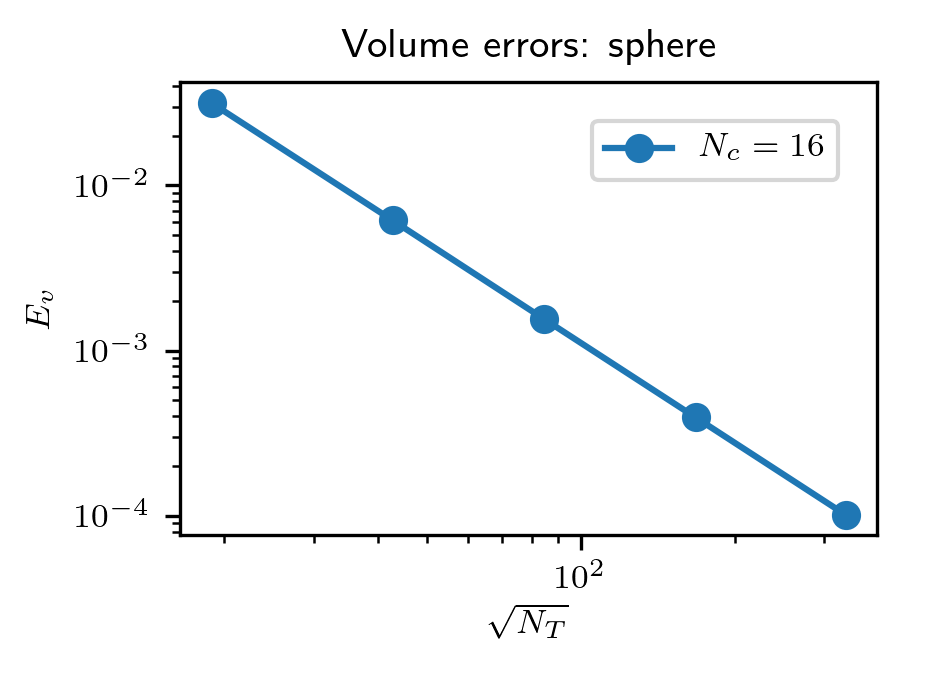

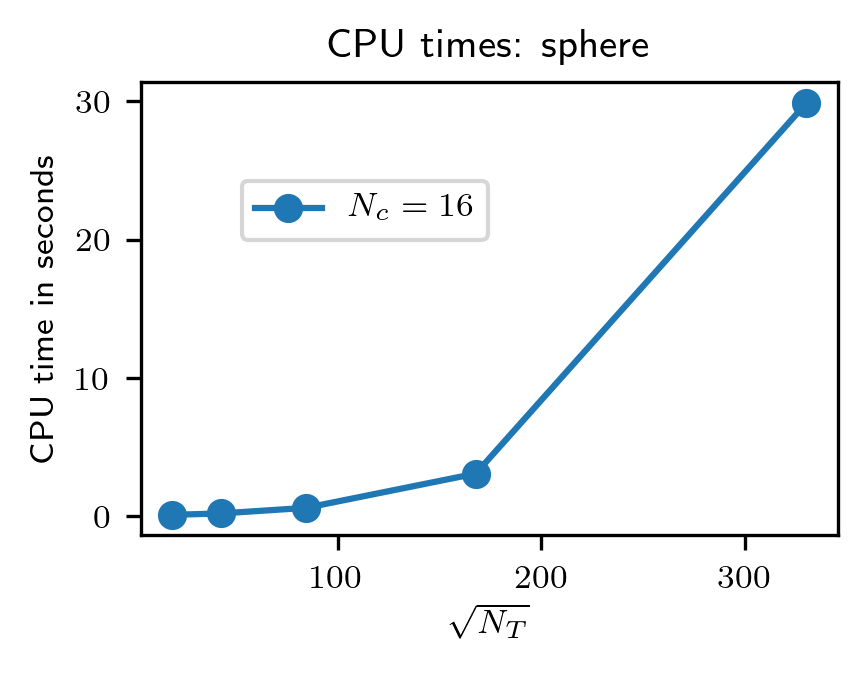

In [3]:
# Exact volume of the sphere.  
sphere_radius = 0.15 # WARNING: Adapt this if another radius is chosen for the sphere in the study. 
sphere_volume = sphere_radius** 3 * 4 * pi / 3.

sphere_data = plot_study("sphere", "blockMesh", alg_name="SMCI", exact_volume=sphere_volume, data_dir=data_dir)

###  CPU time complexity  

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline

x_labels = ["N_TRIANGLES_PER_CELL", "N_INTERSECTED_CELLS", "N_TRIANGLES"]
x_data = sphere_data[x_labels].values.reshape(-1,3) 
y_data = sphere_data["CPU_TIME_SECONDS"].values.reshape(-1,1)
y_data = y_data / y_data.max() - y_data.min()

def plot_cpu_model(sphere_data, x_labels, model):
    fig, ax = plt.subplots()
    n_cells = list(set(sphere_data["N_C"]))
    for i,n_cell in enumerate(n_cells):
        n_cell_data = sphere_data[sphere_data["N_C"] == n_cell]
        model_values = model.predict(n_cell_data[x_labels].values.reshape(-1,3))
        ax.plot(n_cell_data["N_TRIANGLES_ROOT"], model_values, 
                 marker=global_markers[i], color='r', label = "$N_c = %d$ model" % n_cell)
        ax.plot(n_cell_data["N_TRIANGLES_ROOT"], n_cell_data["CPU_TIME_SECONDS"], 
                 marker=global_markers[i], color='b', label = "$N_c = %d$" % n_cell)
    ax.set_ylabel("CPU time in seconds")
    ax.set_xlabel("$\sqrt{N_T}$")
    ax.legend()

Model training score : 1.000
['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3']
[[-8.88178420e-16  1.89418985e-06 -5.29090660e-17  2.08187920e-07
   1.65651574e-10  1.47983582e-08  3.73043874e-11  0.00000000e+00
   1.62646813e-09  8.38969422e-12  3.41141217e-15  1.29415292e-12
   7.47267006e-16  1.15612173e-10  2.91440527e-13  1.63587514e-16
   0.00000000e+00  1.27067822e-11  6.55444861e-14  3.57919558e-17]]


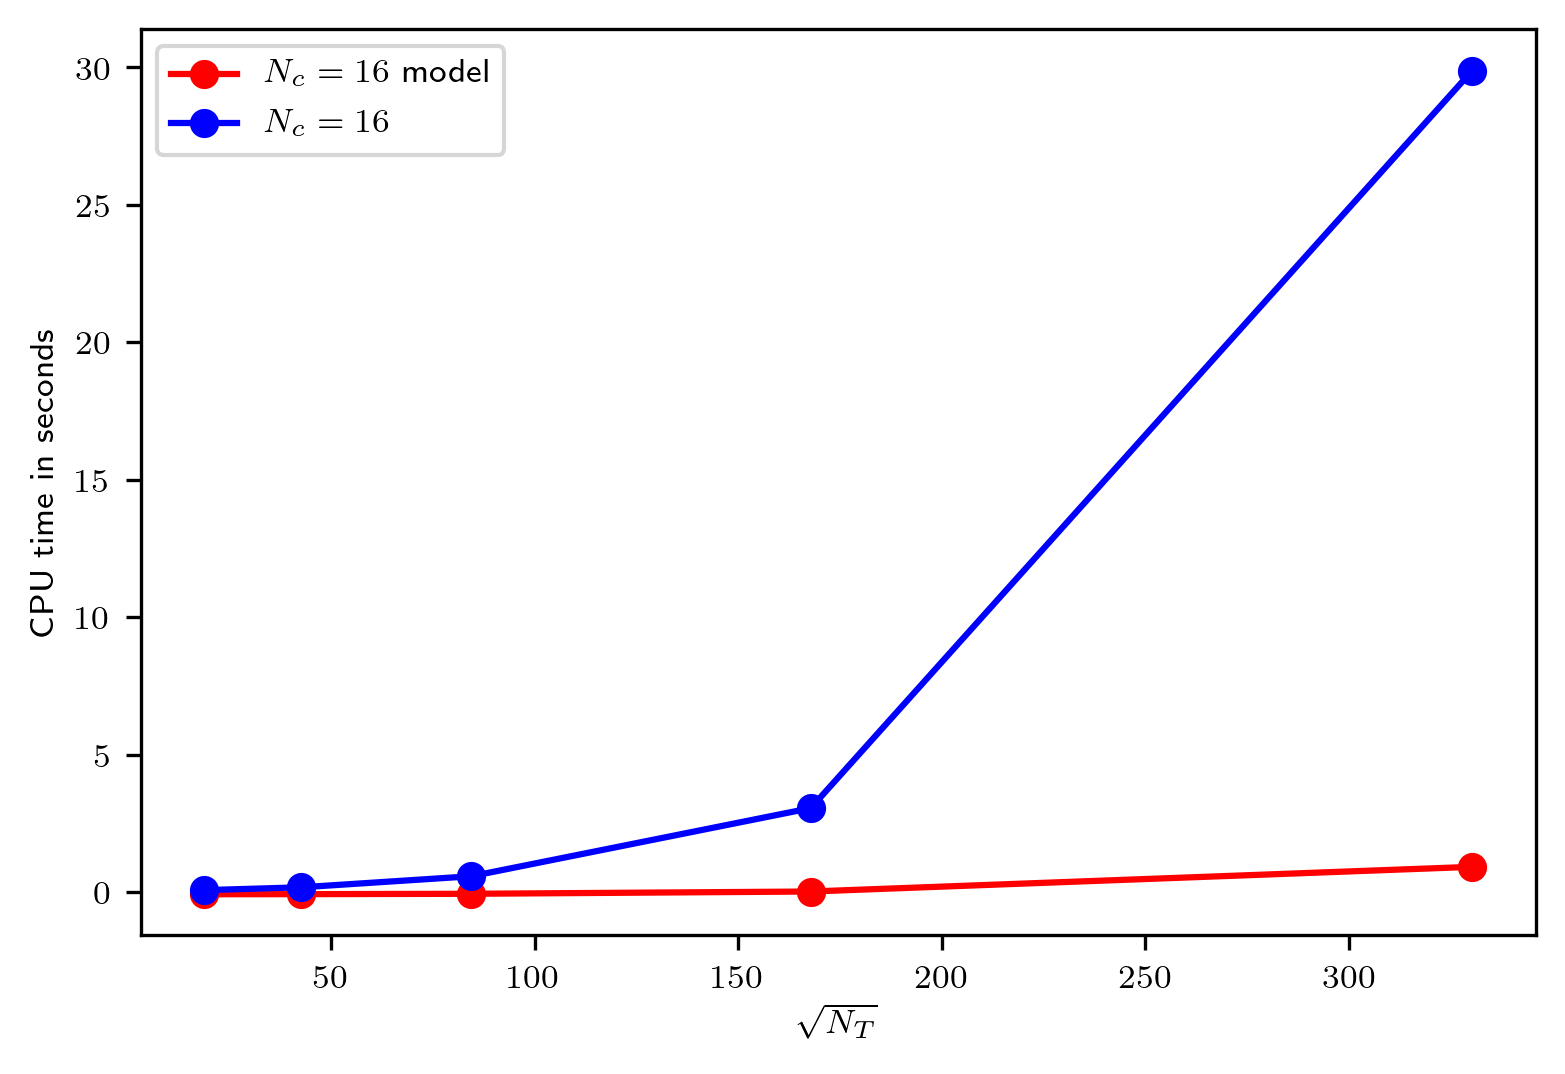

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg_pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear', LinearRegression(fit_intercept=True, normalize=True))])
lin_reg = lin_reg_pipe.fit(x_data, y_data)
print("Model training score : %.3f" % lin_reg.score(x_data, y_data))

poly_features = lin_reg_pipe['poly']
print(poly_features.get_feature_names())
lin_reg_model = lin_reg_pipe['linear']
print(lin_reg_model.coef_)

plot_cpu_model(sphere_data, x_labels, lin_reg)

Model training score : 1.000
['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3']
[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.59335753e-07
 1.15959036e-09 1.80016309e-08 0.00000000e+00 0.00000000e+00
 3.56266894e-10 0.00000000e+00 8.38743509e-15 0.00000000e+00
 4.99174468e-17 1.29763610e-10 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


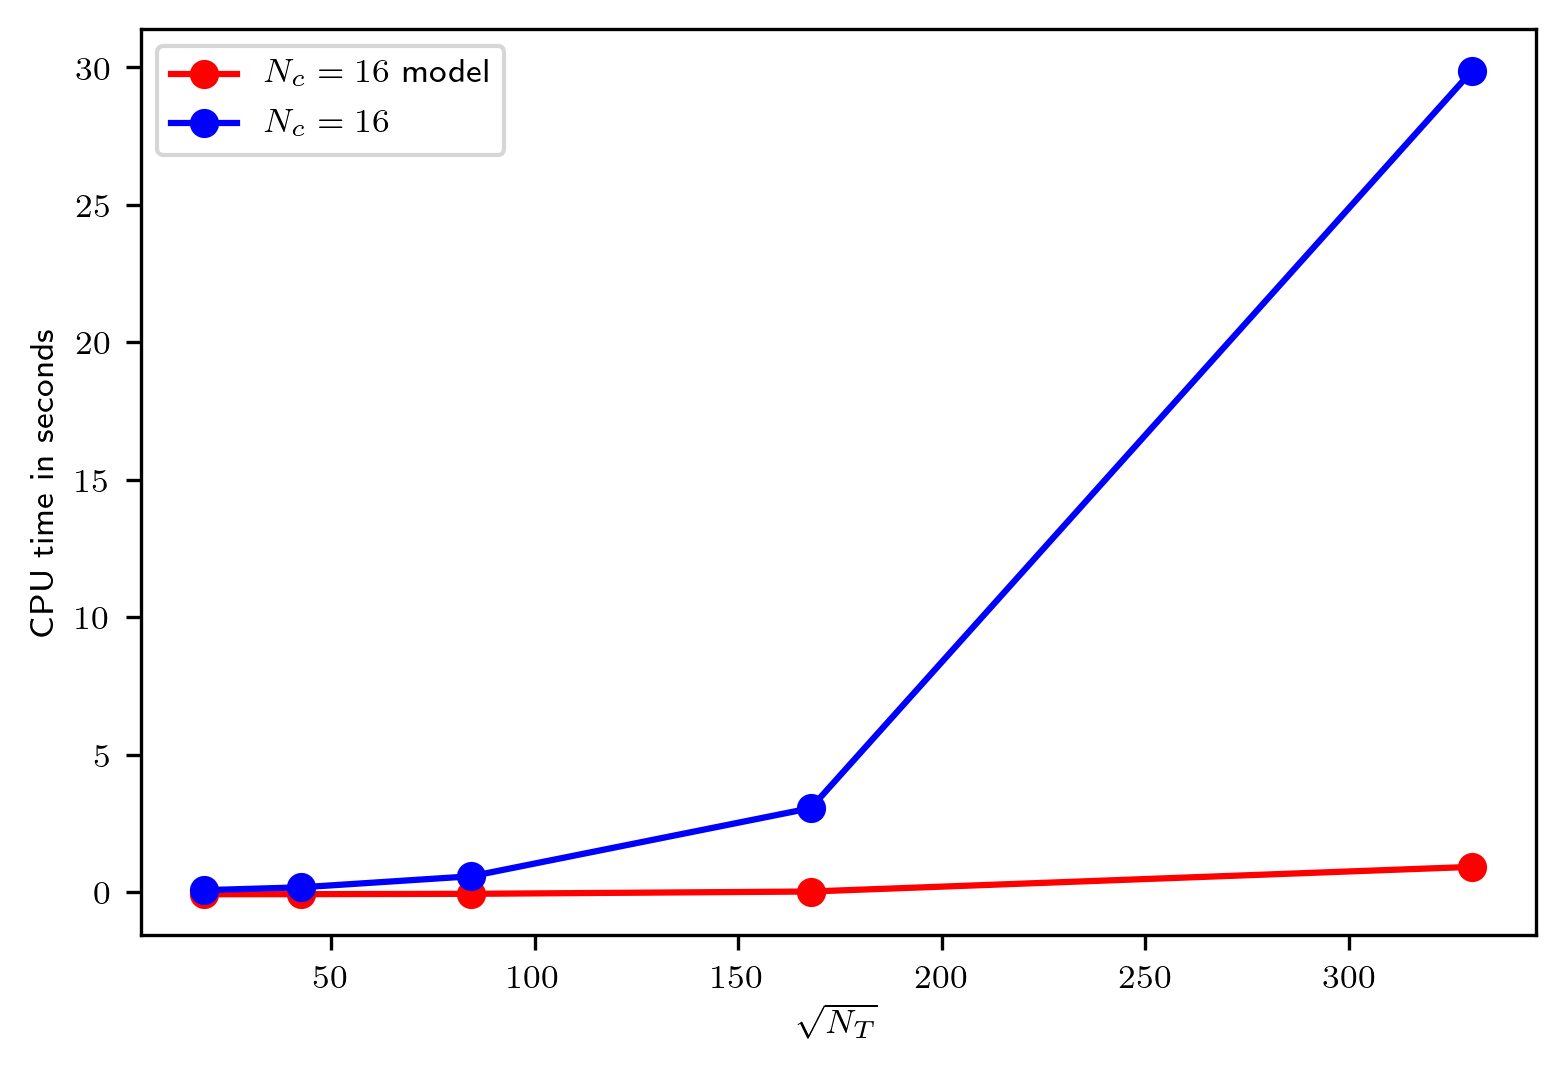

In [6]:
from sklearn.linear_model import Lasso

lasso_pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
                         ('lasso', Lasso(positive=True, normalize=False, max_iter=2000))])
lasso = lasso_pipe.fit(x_data, y_data)
print("Model training score : %.3f" % lasso.score(x_data, y_data))

lasso_features = lasso_pipe['poly']
print(lasso_features.get_feature_names())
lasso_model = lasso_pipe['lasso']
print(lasso_model.coef_)

plot_cpu_model(sphere_data, x_labels, lasso)